# Final Project Template
**Notebook Preparation for Lesson**

Once you open the notebook:

1. Save in on your google drive (copy to drive) and name it DMAP FA21 Final Project
2. Share the notebook and copy the share ID to the NOTEBOOK_ID (and re-save the notebook)
3. This ID should remain the same for all your milestones
4. You will submit a copy of your updated notebook (this file) on Moodle for each milestone


In [ ]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Drug Consumption Classifier"
NOTEBOOK_ID   = "1BWQmewhhy2DbSS4bmAn15izGYlpzh8cw"
VERSION = "FA21"


---
# Project Introduction

Double click on this cell to see its contents.  We expect you to replace this cell.

<img align="left" src="http://drive.google.com/uc?export=view&id=1nA9491MchEtFcklvtIGqOnipE63C2FGD"/>

• Describe the **context**, sitution, problem to be solved/explored

• Whatever you need to get the reader _involved_

• Images can be hosted using google drive (you may need to create a transparent border)

• Even formulas when needed: 
$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$$

• Note that markdown is very whitespace sensitive.
• Click on this cell to read comments.

<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [8]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Drug Consumption Classifier
<video width="600" controls>
  <source src="https://www.youtube.com/watch?v=PUkgdf96mQU"
  type="video/mp4">
</video>
</div>
Note: If your video is too large, you can host it on Vimeo, YouTube, etc and paste the URL here.
If the video doesn't play in the cell, follow the YouTube link

In [ ]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import requests
from io import StringIO

#Project Introduction
Drug consumption (legal and illegal) is rampant in this current world. Is there a way to quantify whether or not someone is a user of a certain drug based on particular categorical and quantitative characteristics? Well, duh! It would be a giant waste of time if there wasn't and my grade would tank.

The data was taken from the UCI Machine Learning Repository and has 1,885 instances. The goal is to classify whether or not someone is a user of a certain drugs, and we will implement this **Binary Classification** using **SKLearn's Support Vector Machine**. Want to know more about the data? Scroll on down!

# Data Acquisition, Selection, Cleaning
Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (**alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron)**) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains **seven classes**: "Never Used: **CL0**", "Used over a Decade Ago: **CL1**", "Used in Last Decade: **CL2**", "Used in Last Year: **CL3**", "Used in Last Month: **CL4**", "Used in Last Week: **CL5**", and "Used in Last Day: **CL6**".


Luckily for us, the data does not need to be cleaned because all the rows and columns are filled.

Now, let's get to why we are using a **Support Vector Machine**. The way a support vector machine works is that if you pass it data, it will output a **Hyperplane** (line in 2D) that best separates the features.

Here is a visualization: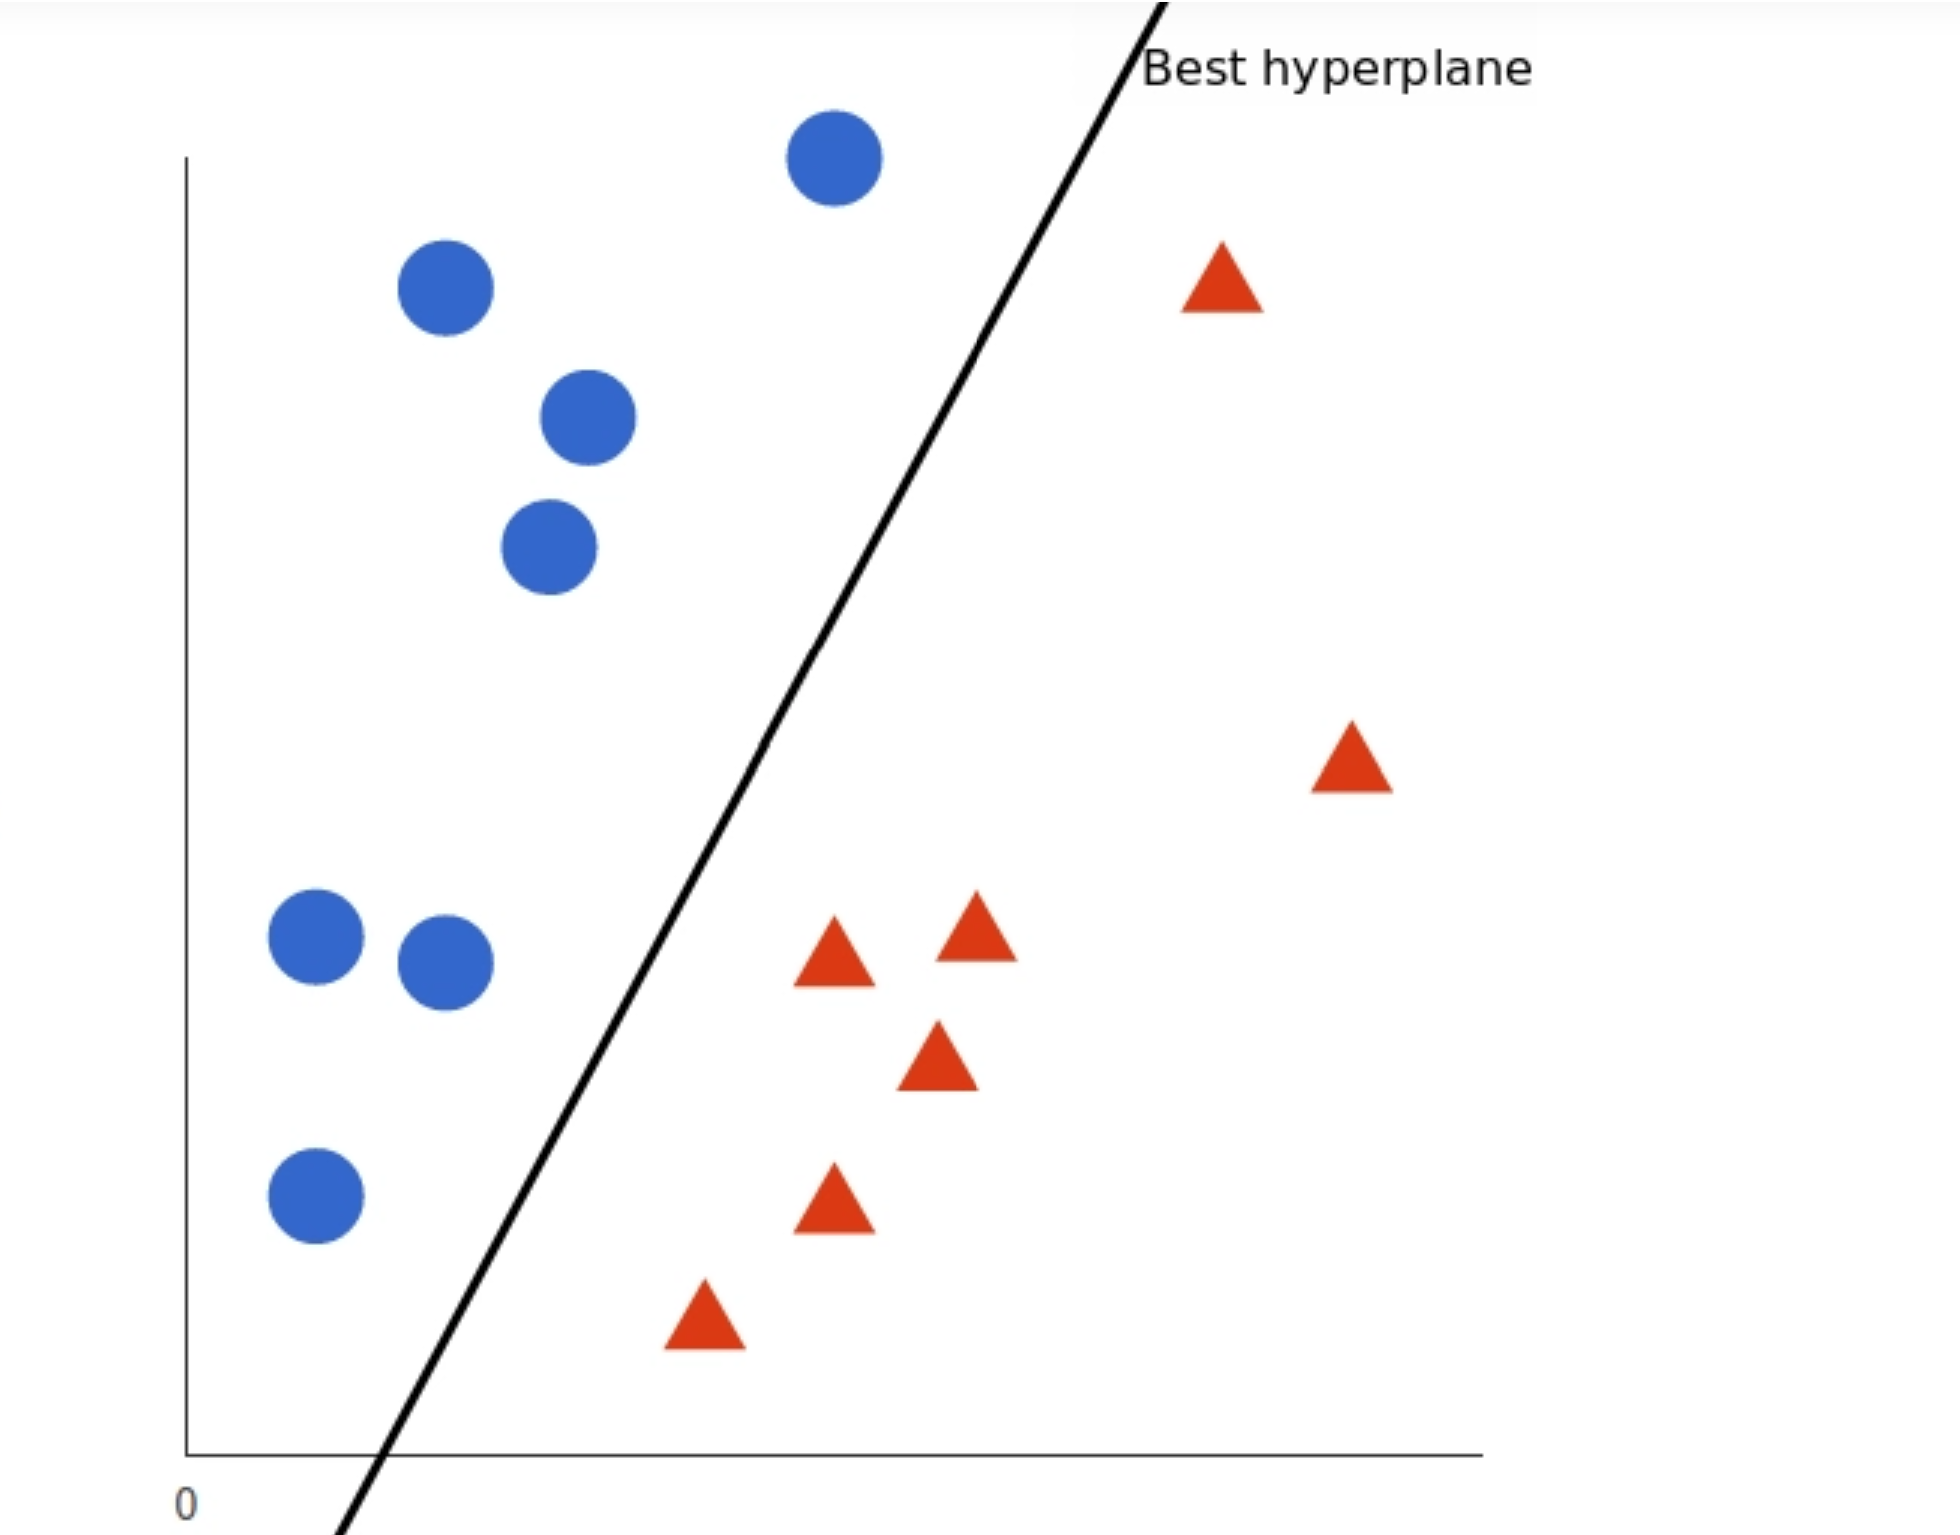

Anything to the left of the line will be classified as blue, and everything to the right will be classified as red.

**Note: Mathematically, the line maximizes the distance from the closest point of each category to the line. In other words, the line crosses the midpoint between the two closest points**

Our task is to figure out the best hyperplace to classify users and non-users. To do this, we will group the features CL0 and CL1 into the non-users category and CL2, CL3, CL4, CL5, and CL6 into the users category.

In [ ]:
csv_url = 'https://raw.githubusercontent.com/Swashbuckler1/Drug-Consumption-Classifier/main/drug_data.csv'

df = pd.read_csv(csv_url)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2.1,CL6,CL0.1,CL5.1,CL0.2,CL0.3,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
df_cpy = df.copy()
df_cpy.replace(['CL0', 'CL1', 'CL0.1', 'CL0.10', 'CL0.11', 'CL0.12', 'CL0.2', 'CL0.3', 'CL0.4', 'CL0.5',
                'CL0.6', 'CL0.7', 'CL0.8', 'CL0.9'], -1, inplace=True) # Non-users


for i in range(2, 7):
  df_cpy.replace('CL' + str(i), 1, inplace=True) # Users
df_cpy.replace(['CL2.1', 'CL2.2', 'CL5.1'], 1, inplace=True)
df_cpy.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,-1,1,1,1,1,-1,1,-1,1,-1,1,1,-1,1,-1,-1
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,-1,-1,1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1


**Note:** If any of the subsequent classification cells decide not to run after any point, that is due to a randomization error which results in picking data from only one class. To fix this, re-run the above two cells and it should work.

# Data Exploration
Initial exploration of the dataset, not required, but useful to give the reader a 'view' of the data

# Data Analysis

In [ ]:
from sklearn import preprocessing, model_selection, svm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
def display_confusion_matrix(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots()
  
  ax.imshow(matrix, interpolation=None, cmap='cool')
  ax.set_title('Confusion Matrix')
  ax.set_ylabel('Actual')
  ax.set_xlabel('Predicted')
  
  entries = [['TN', 'FU'], ['FN', 'TU']]
  ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

  for i in range(2):
    for j in range(2):
      ax.text(j, i, str(entries[i][j]) + ' = ' + str(matrix[i][j]))
  return fig

def display_hyperplane(clf, fig, ax):
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter') # Training data plotted as dots
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', marker='s') # Testing data plotted as squares
  w = clf.coef_[0]
  a = -w[0] / w[1]
  xlim = ax.get_xlim()
  xx = np.linspace(xlim[0], xlim[1])
  yy = a * xx - (clf.intercept_[0] / w[1])
  ax.plot(xx, yy, c='red')
  #return fig

Accuracy: 0.538135593220339

Classification Report
               precision    recall  f1-score   support

        -1.0       0.55      0.60      0.58       247
         1.0       0.52      0.47      0.49       225

    accuracy                           0.54       472
   macro avg       0.54      0.53      0.53       472
weighted avg       0.54      0.54      0.54       472



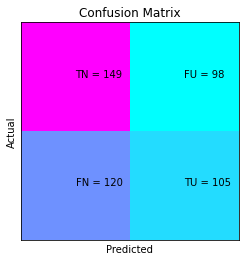

In [ ]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
labels = ['Alcohol',	'Amphet',	'Amyl',	'Benzos',	'Caff',	'Cannabis', 'Choc', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
          'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df_update = df_cpy.sample(frac = 0.5)
df_update.Alcohol = -1
df_cpy.update(df_update)

X = np.array(df_cpy[features])
y = np.array(df_cpy['Alcohol'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))
# Take Ascore and Impulsive values, make pd dataframe and make boolean guards to create function which calculates ind var as function of ind var

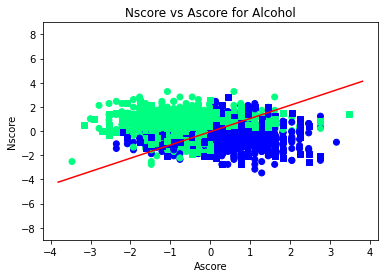

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Alcohol'

#These loops are done just for plotting purposes. Nothing to do with the original classification
for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-9, 9)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7203389830508474

Classification Report
               precision    recall  f1-score   support

        -1.0       0.78      0.78      0.78       302
         1.0       0.61      0.62      0.61       170

    accuracy                           0.72       472
   macro avg       0.70      0.70      0.70       472
weighted avg       0.72      0.72      0.72       472



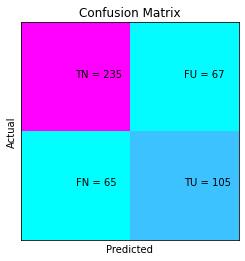

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Amphet'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

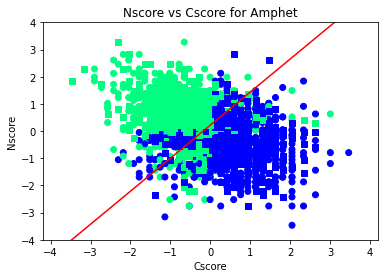

In [ ]:
xs = ['Cscore', 'Nscore']
target = 'Amphet'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.8199152542372882

Classification Report
               precision    recall  f1-score   support

        -1.0       0.82      1.00      0.90       387
         1.0       1.00      0.00      0.00        85

    accuracy                           0.82       472
   macro avg       0.91      0.50      0.45       472
weighted avg       0.85      0.82      0.74       472



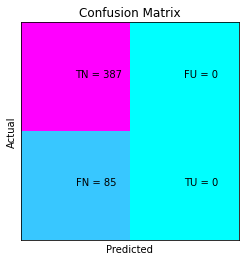

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Amyl'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

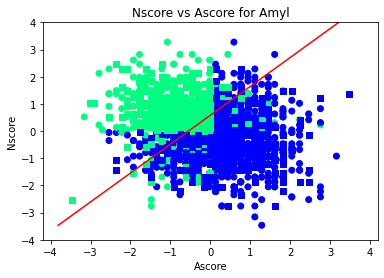

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Amyl'

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.701271186440678

Classification Report
               precision    recall  f1-score   support

        -1.0       0.76      0.76      0.76       293
         1.0       0.61      0.60      0.60       179

    accuracy                           0.70       472
   macro avg       0.68      0.68      0.68       472
weighted avg       0.70      0.70      0.70       472



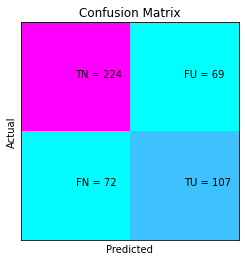

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Benzos'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

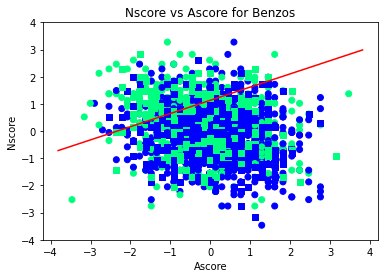

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Benzos'

X = np.array(df_cpy[['Ascore', 'Nscore']])
y = np.array(df_cpy['Benzos'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.9788135593220338

Classification Report
               precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00        10
         1.0       0.98      1.00      0.99       462

    accuracy                           0.98       472
   macro avg       0.99      0.50      0.49       472
weighted avg       0.98      0.98      0.97       472



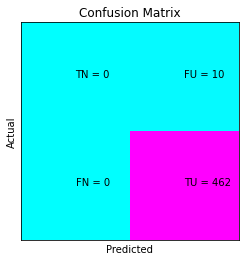

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Caff'])

df_update = df_cpy.sample(frac = 0.5)
df_update.Caff = -1
df_cpy.update(df_update)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

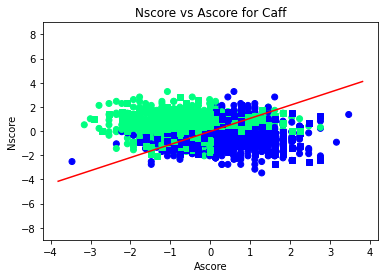

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Caff'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-9, 9)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.8283898305084746

Classification Report
               precision    recall  f1-score   support

        -1.0       0.75      0.73      0.74       156
         1.0       0.87      0.88      0.87       316

    accuracy                           0.83       472
   macro avg       0.81      0.80      0.81       472
weighted avg       0.83      0.83      0.83       472



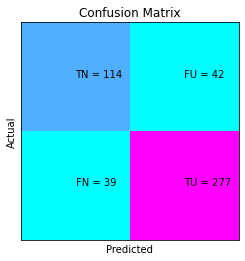

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Cannabis'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

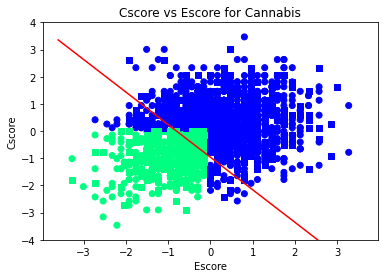

In [ ]:
xs = ['Escore', 'Cscore']
target = 'Cannabis'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[1]][i] < 0 and df_cpy[xs[0]][i] < 0:
    df_cpy[target][i] = 1
  else:
    df_cpy[target][i] = -1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.4491525423728814

Classification Report
               precision    recall  f1-score   support

        -1.0       0.46      0.36      0.40       246
         1.0       0.44      0.55      0.49       226

    accuracy                           0.45       472
   macro avg       0.45      0.45      0.45       472
weighted avg       0.45      0.45      0.44       472



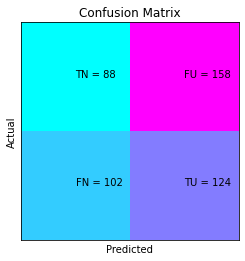

In [ ]:
df_update = df_cpy.sample(frac = 0.5)
df_update.Choc = -1
df_cpy.update(df_update)

X = np.array(df_cpy[features])
y = np.array(df_cpy['Choc'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

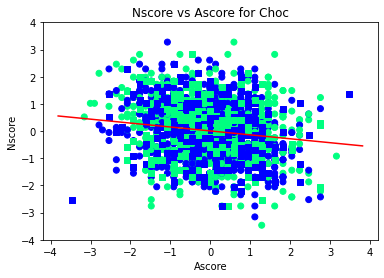

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Choc'

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.6885593220338984

Classification Report
               precision    recall  f1-score   support

        -1.0       0.74      0.80      0.77       307
         1.0       0.57      0.47      0.51       165

    accuracy                           0.69       472
   macro avg       0.65      0.64      0.64       472
weighted avg       0.68      0.69      0.68       472



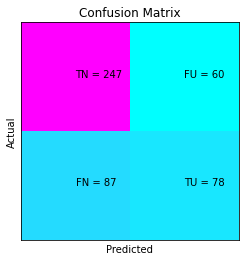

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Cocaine'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

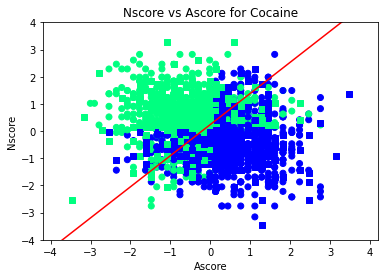

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Cocaine'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.8940677966101694

Classification Report
               precision    recall  f1-score   support

        -1.0       0.89      1.00      0.94       422
         1.0       1.00      0.00      0.00        50

    accuracy                           0.89       472
   macro avg       0.95      0.50      0.47       472
weighted avg       0.91      0.89      0.84       472



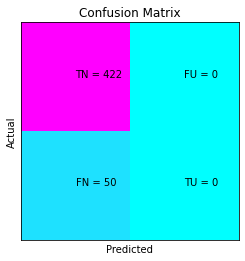

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Crack'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

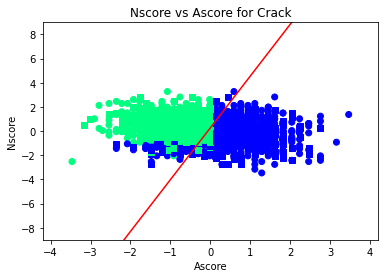

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Crack'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 3:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > -1:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-9, 9)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7351694915254238

Classification Report
               precision    recall  f1-score   support

        -1.0       0.78      0.77      0.77       279
         1.0       0.67      0.69      0.68       193

    accuracy                           0.74       472
   macro avg       0.73      0.73      0.73       472
weighted avg       0.74      0.74      0.74       472



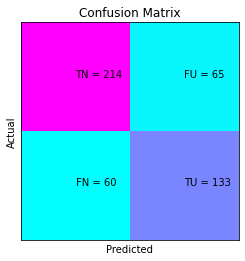

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Ecstasy'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

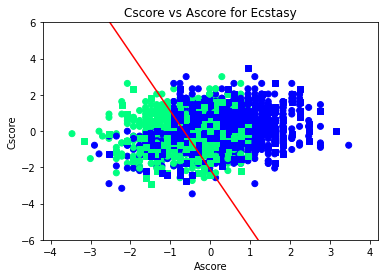

In [ ]:
xs = ['Ascore', 'Cscore']
target = 'Ecstasy'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] < -1 and df_cpy[xs[1]][i] > 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-6, 6)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.9788135593220338

Classification Report
               precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99       406
         1.0       0.95      0.89      0.92        66

    accuracy                           0.98       472
   macro avg       0.97      0.94      0.95       472
weighted avg       0.98      0.98      0.98       472



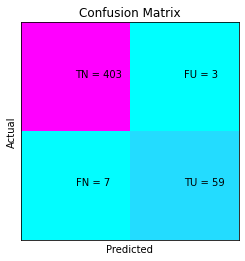

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Heroin'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

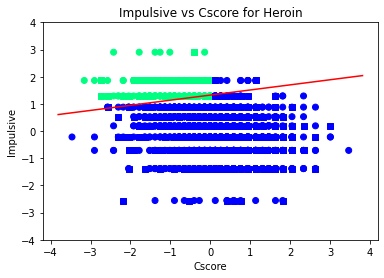

In [ ]:
xs = ['Cscore', 'Impulsive']
target = 'Heroin'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[1]][i] > 1 and df_cpy[xs[0]][i] < 0:
    df_cpy[target][i] = 1
  else:
    df_cpy[target][i] = -1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7690677966101694

Classification Report
               precision    recall  f1-score   support

        -1.0       0.78      0.87      0.82       283
         1.0       0.76      0.62      0.68       189

    accuracy                           0.77       472
   macro avg       0.77      0.75      0.75       472
weighted avg       0.77      0.77      0.76       472



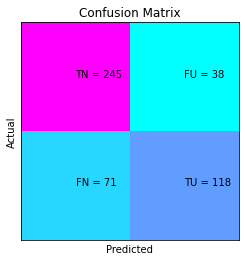

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Ketamine'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

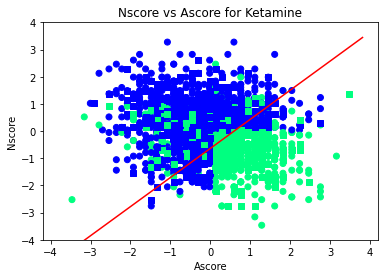

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Ketamine'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.815677966101695

Classification Report
               precision    recall  f1-score   support

        -1.0       0.87      0.85      0.86       306
         1.0       0.73      0.76      0.74       166

    accuracy                           0.82       472
   macro avg       0.80      0.80      0.80       472
weighted avg       0.82      0.82      0.82       472



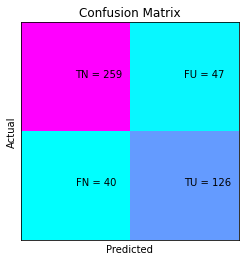

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Legalh'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

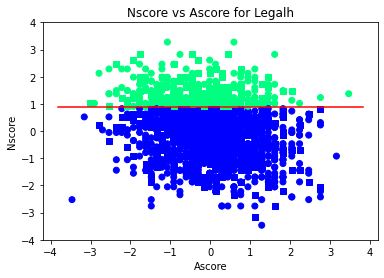

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Legalh'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[1]][i] < 0.9:
    df_cpy[target][i] = -1
  else:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7733050847457628

Classification Report
               precision    recall  f1-score   support

        -1.0       0.77      0.79      0.78       241
         1.0       0.77      0.76      0.77       231

    accuracy                           0.77       472
   macro avg       0.77      0.77      0.77       472
weighted avg       0.77      0.77      0.77       472



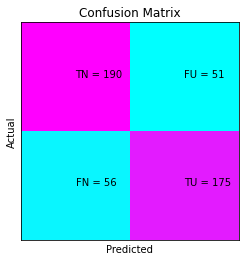

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['LSD'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

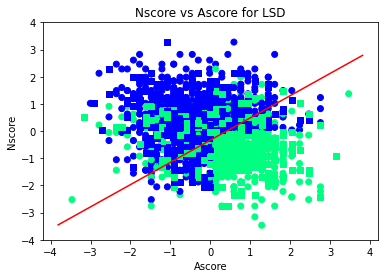

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'LSD'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7690677966101694

Classification Report
               precision    recall  f1-score   support

        -1.0       0.79      0.83      0.81       276
         1.0       0.74      0.68      0.71       196

    accuracy                           0.77       472
   macro avg       0.76      0.76      0.76       472
weighted avg       0.77      0.77      0.77       472



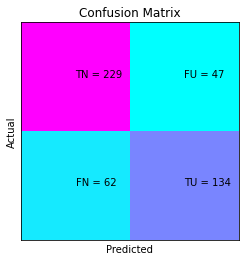

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Meth'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

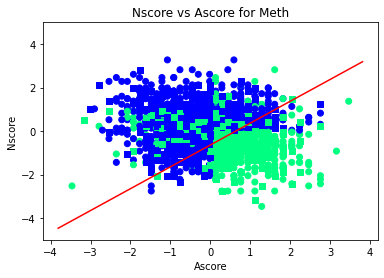

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Meth'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-5, 5)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7436440677966102

Classification Report
               precision    recall  f1-score   support

        -1.0       0.74      0.79      0.76       248
         1.0       0.75      0.70      0.72       224

    accuracy                           0.74       472
   macro avg       0.74      0.74      0.74       472
weighted avg       0.74      0.74      0.74       472



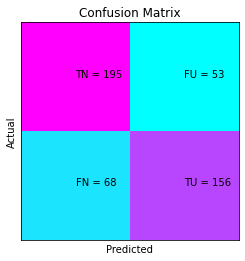

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Mushrooms'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

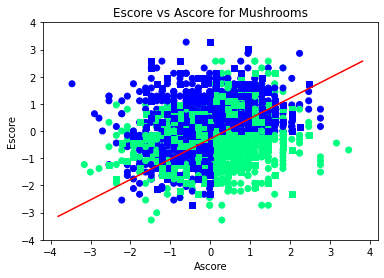

In [ ]:
xs = ['Ascore', 'Escore']
target = 'Mushrooms'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.7436440677966102

Classification Report
               precision    recall  f1-score   support

        -1.0       0.62      0.40      0.49       144
         1.0       0.77      0.89      0.83       328

    accuracy                           0.74       472
   macro avg       0.70      0.65      0.66       472
weighted avg       0.73      0.74      0.73       472



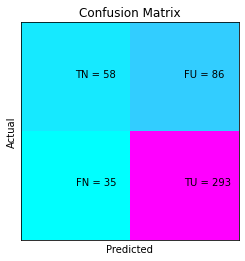

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Nicotine'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

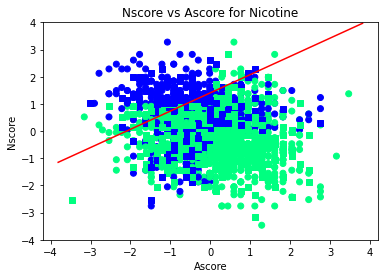

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Nicotine'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 1:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > 0 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

**Note:** This next drug is fake, so it does not matter if the data is not normally distributed

Accuracy: 0.9978813559322034

Classification Report
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       471
         1.0       1.00      0.00      0.00         1

    accuracy                           1.00       472
   macro avg       1.00      0.50      0.50       472
weighted avg       1.00      1.00      1.00       472



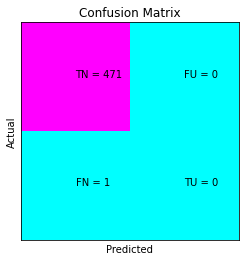

In [ ]:
X = np.array(df_cpy[features])
y = np.array(df_cpy['Semer'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

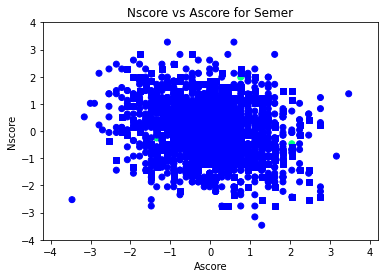

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'Semer'

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

Accuracy: 0.9152542372881356

Classification Report
               precision    recall  f1-score   support

        -1.0       0.90      0.92      0.91       218
         1.0       0.93      0.91      0.92       254

    accuracy                           0.92       472
   macro avg       0.91      0.92      0.91       472
weighted avg       0.92      0.92      0.92       472



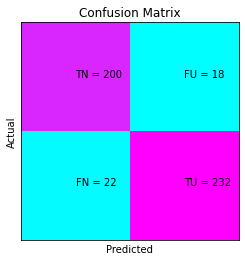

In [ ]:
X = np.array(df_cpy[['Ascore', 'Nscore']])
y = np.array(df_cpy['VSA'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = clf.predict(X_test)
display_confusion_matrix(y_test, y_pred)
print("\nClassification Report\n", classification_report(y_test, y_pred, zero_division=1))

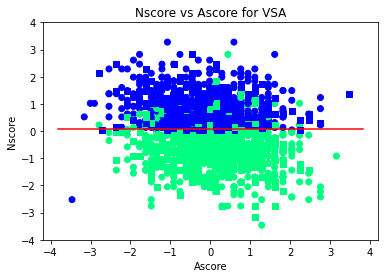

In [ ]:
xs = ['Ascore', 'Nscore']
target = 'VSA'

for i in range(df_cpy[xs[0]].values.size):
  if df_cpy[xs[0]][i] < 0 and df_cpy[xs[1]][i] > 3:
    df_cpy[target][i] = -1
  elif df_cpy[xs[0]][i] > -3 and df_cpy[xs[1]][i] < 0:
    df_cpy[target][i] = 1

X = np.array(df_cpy[xs])
y = np.array(df_cpy[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.set_ylim(-4, 4)
ax.set_xlabel(xs[0])
ax.set_ylabel(xs[1])
ax.set_title(xs[1] + ' vs ' + xs[0] + ' for ' + target)
display_hyperplane(clf, fig, ax)

**Playground**

SVC(kernel='linear')

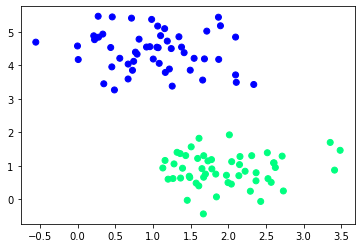

In [ ]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=125, centers=2, cluster_std=.6, random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=20, random_state=0)
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

clf.fit(X_train, y_train)

In [ ]:
display_hyperplane(clf, fig, ax)

# Summary

Congratulations! We were able to run the Support Vector Classifier on each drug to determine whether or not someone is a user based on the feature variables. The two feature variables used for plotting the hyperplane were arbitrarily chosen, so you could just change the feature variables to whatever you want them to be and it will graph accordingly.

We performed our classifications with a linear kernel, but if we ever wanted to find a hyperplane in higher dimensions based on how the data is distributed, we would have to use the *rbf* (Gaussian) kernel, which just so happens to be the default. You can also use the *poly* kernel. 






---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

For each milestone, you will submit an updated version of your project notebook (this notebook) with that milestone’s requirements. Your project notebook ID and URL should be the same.

You will also receive the links and instructions to do the peer reviews.

**Submission for Milestone0:**
1. Save a copy of this notebook in your Google drive
3. Share the Noetbook and place the Notebook ID in the first code cell
4. Download as "DMAP_FA21_Final_Project_MS0.ipynb"
5. Submit this in Moodle
